In [1]:
import pandas as pd
import numpy as np

# 원본 데이터 로드
원본 데이터 : `Data1.csv`

|컬럼명|정보|
|---|:---|
|`serial no`|일련번호|
|`request no`|주문 번호| 
|`type`|상품 타입 (스티커, 봉투, 명함)|
|`templet no`|템플릿 일련번호|
|`no of pag`|주문 페이지 수|
|`receve ready time`|주문 후 결제 대기 시간(접수 시작 시간)|
|`receve comp time`|주문 후 결제 완료 시간(접수 완료 시간)|
|`out time`|출고 완료 시간|
|`process time`|작업공정 시간|
|`lead time`|제조리드타임 시간|
|`mol no`|몰 주문번호|
|`plate no`|판번호|
|`status`|공정상태|
|`printing start time`|인쇄 시작 시간|
|`printing comp time`|인쇄 완료 시간|
|`cutting start time`|커팅 시작 시간|
|`cutting comp time`|커팅 완료 시간|
|`post start time`|후가공 시작 시간|
|`post comp time`|후가공 완료 시간|
|`delivery time`|배송 시작 시간|
|`coating error time`|코팅 불량 시간|
|`cutting error time`|커팅 불량 시간|
|`pac time`|포장 완료 시간|
|`printing pages`|인쇄 작업 수|
|`packings`|포장 작업 수|
|`coatings`|코팅 작업 수|
|`cuttings`|커팅 작업 수|
|`issue date`|생성일|
|`update date`|수정일|

In [2]:
csv_path = '../Data1.csv'
df = pd.read_csv(csv_path)
df.head()

,serial no,request no,type,templet no,no of pages,receve ready time,receve comp time,out time,process time,lead time,...,delivery time,coating error time,cutting error time,pac time,printing pages,packings,coatings,cuttings,issue date,update date
0,1557720,ex2012077869,스티커,818966,2,2020-12-07 17:56:00,2020-12-08 8:10:00,2020-12-09 13:15,43.323889,43.323889,...,2020-12-09 13:15,NaN,NaN,2020-12-08 17:10:00,1,1,0,0,2020-12-08 14:39,NaN
1,1557722,ex2012077838,스티커,818976,2,2020-12-07 18:00:00,2020-12-08 8:10:00,2020-12-09 13:15,43.261667,43.261667,...,2020-12-09 13:15,NaN,NaN,2020-12-08 17:10:00,1,1,0,0,2020-12-08 14:39,NaN
2,1557743,ex2012078690,스티커,817115,2,2020-12-07 18:26:00,2020-12-08 8:10:00,2020-12-09 13:15,42.821389,42.821389,...,2020-12-09 13:15,NaN,NaN,2020-12-08 17:10:00,1,1,0,0,2020-12-08 14:39,NaN
3,1558132,ex2012077417,스티커,818976,2,2020-12-08 11:02:00,2020-12-08 8:10:00,2020-12-09 13:15,26.218889,26.218889,...,2020-12-09 13:15,NaN,NaN,2020-12-08 17:10:00,1,1,0,0,2020-12-08 14:39,NaN
4,1558444,ex2012089506,스티커,818983,2,2020-12-08 11:46:00,2020-12-08 8:10:00,2020-12-09 13:15,25.482500,25.482500,...,2020-12-09 13:15,NaN,NaN,2020-12-08 17:10:00,1,1,0,0,2020-12-08 14:39,NaN


## 데이터 종류 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30062 entries, 0 to 30061
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   serial no            30062 non-null  int64  
 1   request no           30061 non-null  object 
 2   type                 30062 non-null  object 
 3   templet no           30062 non-null  int64  
 4   no of pages          30062 non-null  int64  
 5   receve ready time    30062 non-null  object 
 6   receve comp time     17954 non-null  object 
 7   out time             16291 non-null  object 
 8   process time         17101 non-null  float64
 9   lead time            30062 non-null  float64
 10  mol no               30062 non-null  object 
 11  plate no             30062 non-null  object 
 12  status               30062 non-null  object 
 13  printing start time  17915 non-null  object 
 14  printing comp time   17689 non-null  object 
 15  cutting start time   17689 non-null 

## 데이터가 없는 Column 제거
`post start time`, `post comp time`, `coating error time`, `cutting error time` 4개의 행 해당

In [4]:
df.columns

Index(['serial no', 'request no', 'type', 'templet no', 'no of pages',
       'receve ready time', 'receve comp time', 'out time', 'process time',
       'lead time', 'mol no', 'plate no', 'status', 'printing start time',
       'printing comp time', 'cutting start time', 'cutting comp time',
       'post start time', 'post comp time', 'delivery time',
       'coating error time', 'cutting error time', 'pac time',
       'printing pages', 'packings', 'coatings', 'cuttings', 'issue date',
       'update date'],
      dtype='object')

In [5]:
n_df = df.drop(['post start time', 'post comp time', 'coating error time', 'cutting error time'], axis=1)
n_df.columns

Index(['serial no', 'request no', 'type', 'templet no', 'no of pages',
       'receve ready time', 'receve comp time', 'out time', 'process time',
       'lead time', 'mol no', 'plate no', 'status', 'printing start time',
       'printing comp time', 'cutting start time', 'cutting comp time',
       'delivery time', 'pac time', 'printing pages', 'packings', 'coatings',
       'cuttings', 'issue date', 'update date'],
      dtype='object')

## 데이터 결측치 포함 행 전체 제거

In [6]:
n_df = n_df.dropna(axis=0)

In [7]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16158 entries, 30 to 30040
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   serial no            16158 non-null  int64  
 1   request no           16158 non-null  object 
 2   type                 16158 non-null  object 
 3   templet no           16158 non-null  int64  
 4   no of pages          16158 non-null  int64  
 5   receve ready time    16158 non-null  object 
 6   receve comp time     16158 non-null  object 
 7   out time             16158 non-null  object 
 8   process time         16158 non-null  float64
 9   lead time            16158 non-null  float64
 10  mol no               16158 non-null  object 
 11  plate no             16158 non-null  object 
 12  status               16158 non-null  object 
 13  printing start time  16158 non-null  object 
 14  printing comp time   16158 non-null  object 
 15  cutting start time   16158 non-null

# X, Y 정의
X1 : (인쇄완료 - 인쇄시작)  
X2 : (커팅시작 - 인쇄완료)  
X3 : (커팅완료 - 커팅시작)  
X4 : (포장완료 - 커팅완료)  
Y0 : (포장완료 - 접수완료)

In [8]:
# string to dt
target_col = ['printing start time', 'printing comp time', 'cutting start time', 'cutting comp time', 'pac time']

n_df[target_col].head()

,printing start time,printing comp time,cutting start time,cutting comp time,pac time
30,2020-12-08 11:36:00,2020-12-08 13:11:00,2020-12-08 14:10:00,2020-12-08 14:40:00,2020-12-08 17:12:00
31,2020-12-08 11:36:00,2020-12-08 13:11:00,2020-12-08 14:10:00,2020-12-08 14:40:00,2020-12-08 17:12:00
32,2020-12-08 11:36:00,2020-12-08 13:11:00,2020-12-08 14:10:00,2020-12-08 14:40:00,2020-12-08 17:12:00
33,2020-12-08 11:36:00,2020-12-08 13:11:00,2020-12-08 14:10:00,2020-12-08 14:40:00,2020-12-08 17:12:00
34,2020-12-08 11:36:00,2020-12-08 13:11:00,2020-12-08 14:10:00,2020-12-08 14:40:00,2020-12-08 17:12:00


## String Date -> DateTime 객체로 변환

In [9]:
for col in target_col:
    n_df[col] = pd.to_datetime(n_df[col], format='%Y-%m-%d %H:%M:%S', errors='raise')

n_df[target_col].head()

,printing start time,printing comp time,cutting start time,cutting comp time,pac time
30,2020-12-08 11:36:00,2020-12-08 13:11:00,2020-12-08 14:10:00,2020-12-08 14:40:00,2020-12-08 17:12:00
31,2020-12-08 11:36:00,2020-12-08 13:11:00,2020-12-08 14:10:00,2020-12-08 14:40:00,2020-12-08 17:12:00
32,2020-12-08 11:36:00,2020-12-08 13:11:00,2020-12-08 14:10:00,2020-12-08 14:40:00,2020-12-08 17:12:00
33,2020-12-08 11:36:00,2020-12-08 13:11:00,2020-12-08 14:10:00,2020-12-08 14:40:00,2020-12-08 17:12:00
34,2020-12-08 11:36:00,2020-12-08 13:11:00,2020-12-08 14:10:00,2020-12-08 14:40:00,2020-12-08 17:12:00


## X1 ~ X4, Y 설정

In [10]:
X = []
for i in range(4):
    X.append((n_df[target_col[i+1]] - n_df[target_col[i]]).dt.total_seconds() / 60)

In [11]:
X_col = [f"X{i+1}" for i in range(len(X))]

for i, col in enumerate(X_col): 
    n_df[col] = X[i]

n_df.head()

,serial no,request no,type,templet no,no of pages,receve ready time,receve comp time,out time,process time,lead time,...,printing pages,packings,coatings,cuttings,issue date,update date,X1,X2,X3,X4
30,1559353,ex2012080542,봉투,7350,1,2020-12-08 16:37:00,2020-12-08 11:36:00,2020-12-09 13:15,20.637778,20.637778,...,1,1,0,0,2020-12-08 17:36,2020-12-09 13:04,95.0,59.0,30.0,152.0
31,1559354,ex2012080550,명함,13697,1,2020-12-08 16:40:00,2020-12-08 11:36:00,2020-12-09 13:15,20.590556,20.590556,...,1,1,0,0,2020-12-08 17:36,2020-12-09 13:04,95.0,59.0,30.0,152.0
32,1559355,ex2012080551,명함,13697,1,2020-12-08 16:40:00,2020-12-08 11:36:00,2020-12-09 13:15,20.590556,20.590556,...,1,1,0,0,2020-12-08 17:36,2020-12-09 13:04,95.0,59.0,30.0,152.0
33,1559361,ex2012080584,명함,15443,2,2020-12-08 16:48:00,2020-12-08 11:36:00,2020-12-09 13:15,20.460833,20.460833,...,1,1,0,0,2020-12-08 17:36,2020-12-09 13:04,95.0,59.0,30.0,152.0
34,1559366,ex2012080592,명함,37786,2,2020-12-08 16:51:00,2020-12-08 11:36:00,2020-12-09 13:15,20.409167,20.409167,...,1,1,0,0,2020-12-08 17:36,2020-12-09 13:04,95.0,59.0,30.0,152.0


In [12]:
n_df['pac time'] = pd.to_datetime(n_df['pac time'], format='%Y-%m-%d %H:%M:%S', errors='raise')
n_df['receve comp time'] = pd.to_datetime(n_df['receve comp time'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [13]:
n_df['Y0'] = (n_df['pac time'] - n_df['receve comp time']).dt.total_seconds() / 60
n_df

,serial no,request no,type,templet no,no of pages,receve ready time,receve comp time,out time,process time,lead time,...,packings,coatings,cuttings,issue date,update date,X1,X2,X3,X4,Y0
30,1559353,ex2012080542,봉투,7350,1,2020-12-08 16:37:00,2020-12-08 11:36:00,2020-12-09 13:15,20.637778,20.637778,...,1,0,0,2020-12-08 17:36,2020-12-09 13:04,95.0,59.0,30.0,152.0,336.0
31,1559354,ex2012080550,명함,13697,1,2020-12-08 16:40:00,2020-12-08 11:36:00,2020-12-09 13:15,20.590556,20.590556,...,1,0,0,2020-12-08 17:36,2020-12-09 13:04,95.0,59.0,30.0,152.0,336.0
32,1559355,ex2012080551,명함,13697,1,2020-12-08 16:40:00,2020-12-08 11:36:00,2020-12-09 13:15,20.590556,20.590556,...,1,0,0,2020-12-08 17:36,2020-12-09 13:04,95.0,59.0,30.0,152.0,336.0
33,1559361,ex2012080584,명함,15443,2,2020-12-08 16:48:00,2020-12-08 11:36:00,2020-12-09 13:15,20.460833,20.460833,...,1,0,0,2020-12-08 17:36,2020-12-09 13:04,95.0,59.0,30.0,152.0,336.0
34,1559366,ex2012080592,명함,37786,2,2020-12-08 16:51:00,2020-12-08 11:36:00,2020-12-09 13:15,20.409167,20.409167,...,1,0,0,2020-12-08 17:36,2020-12-09 13:04,95.0,59.0,30.0,152.0,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30036,4510804,ex2207292915,명함,773988,2,2022-07-29 16:11:00,2022-07-29 19:18:00,2022-07-29 21:07,4.933611,4.933611,...,1,0,0,2022-07-29 16:11,2022-07-29 21:12,46.0,5.0,63.0,10.0,124.0
30037,4511961,ex2207293013,명함,10939,2,2022-07-29 16:45:00,2022-07-29 19:24:00,2022-07-29 23:43,6.961944,6.961944,...,1,0,0,2022-07-29 16:45,2022-07-29 23:46,80.0,5.0,177.0,10.0,272.0
30038,4511971,ex2207293090,명함,878663,2,2022-07-29 17:13:00,2022-07-29 19:18:00,2022-07-29 21:07,3.892500,3.892500,...,1,0,0,2022-07-29 17:13,2022-07-29 21:12,46.0,5.0,63.0,10.0,124.0
30039,4511972,ex2207293091,명함,878663,2,2022-07-29 17:13:00,2022-07-29 19:18:00,2022-07-29 21:07,3.892500,3.892500,...,1,0,0,2022-07-29 17:13,2022-07-29 21:12,46.0,5.0,63.0,10.0,124.0


In [14]:
data_cols = X_col + ['Y0']
data = n_df[data_cols]

In [15]:
data

,X1,X2,X3,X4,Y0
30,95.0,59.0,30.0,152.0,336.0
31,95.0,59.0,30.0,152.0,336.0
32,95.0,59.0,30.0,152.0,336.0
33,95.0,59.0,30.0,152.0,336.0
34,95.0,59.0,30.0,152.0,336.0
...,...,...,...,...,...
30036,46.0,5.0,63.0,10.0,124.0
30037,80.0,5.0,177.0,10.0,272.0
30038,46.0,5.0,63.0,10.0,124.0
30039,46.0,5.0,63.0,10.0,124.0


## 데이터 상관관계(Heatmap 측정)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

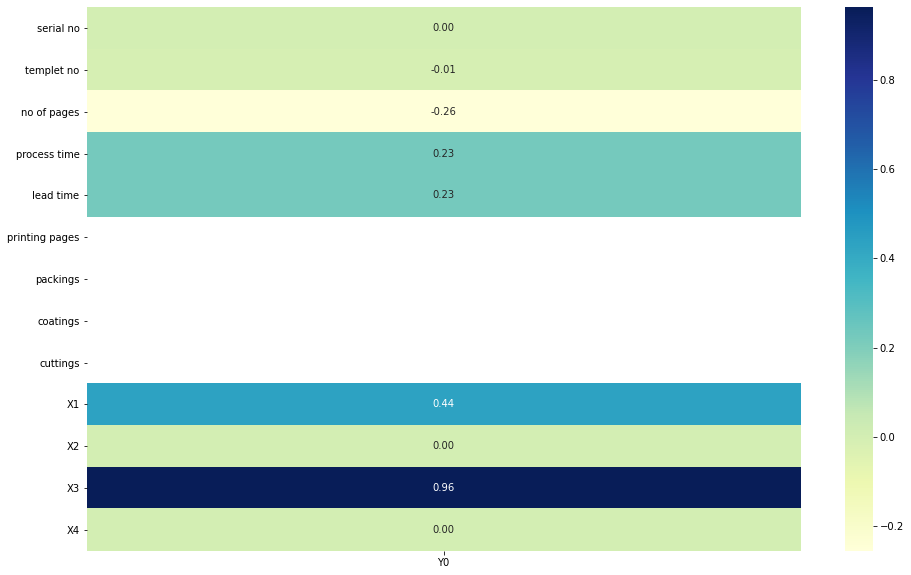

In [17]:
plt.figure(figsize=(16,10))
corr = n_df.corr()
ax = sns.heatmap(corr.iloc[:-1,13:14], annot=True, fmt='.2f', cmap='YlGnBu')

In [18]:
corr = data.corr()

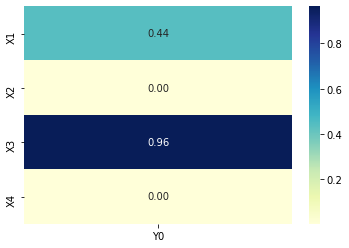

In [19]:
ax = sns.heatmap(corr.iloc[:-1,4:5], annot=True, fmt='.2f', cmap='YlGnBu')

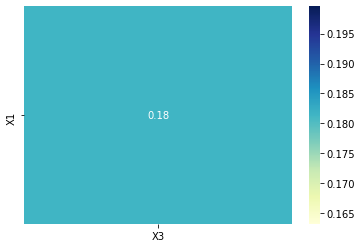

In [20]:
ax = sns.heatmap(corr.iloc[:-4, 2:3], annot=True, fmt='.2f', cmap='YlGnBu')

In [21]:
data[['process time', 'lead time']] = n_df[['process time', 'lead time']]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [113]:
data['no of pages'] = n_df['no of pages']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
data[['packings', 'coatings', 'cuttings']] = n_df[['packings', 'coatings', 'cuttings']]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [22]:
data

,X1,X2,X3,X4,Y0,process time,lead time
30,95.0,59.0,30.0,152.0,336.0,20.637778,20.637778
31,95.0,59.0,30.0,152.0,336.0,20.590556,20.590556
32,95.0,59.0,30.0,152.0,336.0,20.590556,20.590556
33,95.0,59.0,30.0,152.0,336.0,20.460833,20.460833
34,95.0,59.0,30.0,152.0,336.0,20.409167,20.409167
...,...,...,...,...,...,...,...
30036,46.0,5.0,63.0,10.0,124.0,4.933611,4.933611
30037,80.0,5.0,177.0,10.0,272.0,6.961944,6.961944
30038,46.0,5.0,63.0,10.0,124.0,3.892500,3.892500
30039,46.0,5.0,63.0,10.0,124.0,3.892500,3.892500


In [118]:
corr = data.corr()

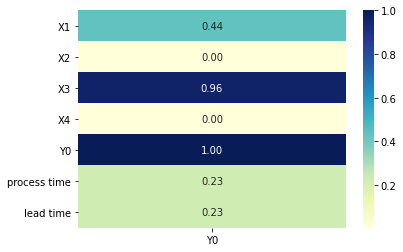

In [136]:
ax = sns.heatmap(corr.iloc[:-4, 4:5], annot=True, fmt='.2f', cmap='YlGnBu')

## Preprocessing

In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [215]:
ss = StandardScaler()

In [216]:
RF = RandomForestRegressor()

# X1 으로 X3 예측
모델 : RandomForest 사용  
아주 성능이 나쁨

In [221]:
X1 = ss.fit_transform(data['X1'].values.reshape(-1, 1))
X3 = data['X3'].values.reshape(-1, 1)
Y0 = data['Y0'].values.reshape(-1, 1)
print(X1.shape, X3.shape, Y0.shape)
x_train, x_test, y_train, y_test = train_test_split(X1, X3, test_size=0.2, shuffle=True)

(16158, 1) (16158, 1) (16158, 1)


In [222]:
RF.fit(x_train, y_train)
y_pred = RF.predict(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [223]:
RF.score(x_test, y_test)

-0.021674113302776687

In [224]:
y_test.reshape(-1), y_pred

(array([  69.,    6.,   18., ..., 1360.,   33.,   21.]),
 array([ 473.56,  503.59, 2923.69, ...,  473.56, 1042.62, 2913.88]))

# X1, X3 로 Y0 예측
성능이 매우 좋음  
Y0와 X3 의 상관관계가 거의 100%에 근접 (Heatmap 0.96)

In [231]:
x_scaled = ss.fit_transform(data[['X1', 'X3']])
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y0, test_size=0.2, shuffle=True)

In [239]:
RF.fit(x_train, y_train.reshape(-1))
y_pred = RF.predict(x_test)

In [241]:
RF.score(x_test, y_test)

0.9916584009799793

In [240]:
y_test.reshape(-1), y_pred

(array([  70., 4473.,  226., ...,  314.,  934.,  471.]),
 array([  70.8 , 4362.98,  226.65, ...,  314.  ,  922.73,  475.33]))

# 결론

X3 를 잘 구해내는 것이 관건이라고 생각됨  
이것을 잘 예측할 수 있는 데이터를 만들어야 할 것이라고 예상됨

In [254]:
# 최종 쓸만한 데이터 분리
data = data[['X1', 'X3', 'Y0']]
data

,X1,X3,Y0
30,95.0,30.0,336.0
31,95.0,30.0,336.0
32,95.0,30.0,336.0
33,95.0,30.0,336.0
34,95.0,30.0,336.0
...,...,...,...
30036,46.0,63.0,124.0
30037,80.0,177.0,272.0
30038,46.0,63.0,124.0
30039,46.0,63.0,124.0
